In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df1=pd.read_csv(r"/content/drive/MyDrive/project/final_dataset_twitter.csv")

In [5]:
ddf=df1.head(200000)
dff=df1.tail(200000)

In [6]:
df = pd.concat([ddf, dff]).reset_index(drop=True)

In [7]:
# check null values in the dataframe
df.isnull().sum()

,0
Unnamed: 0,0
target,0
text,0


In [8]:
print(type(df))  # This should print <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [9]:
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

In [10]:
df.head()

,Unnamed: 0,target,text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,is upset that he can't update his Facebook by ...
2,2,0,@Kenichan I dived many times for the ball. Man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
df.columns

Index(['Unnamed: 0', 'target', 'text'], dtype='object')

In [12]:
df['target'].value_counts()

,count
target,
0,200000
4,200000


In [13]:
df=df.drop(columns ='Unnamed: 0',axis=1)

In [14]:
print(type(df))  # This should print <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [15]:
df.columns

Index(['target', 'text'], dtype='object')

In [16]:
df.replace({'target':{4:1},},inplace=True)

<Axes: xlabel='target', ylabel='count'>

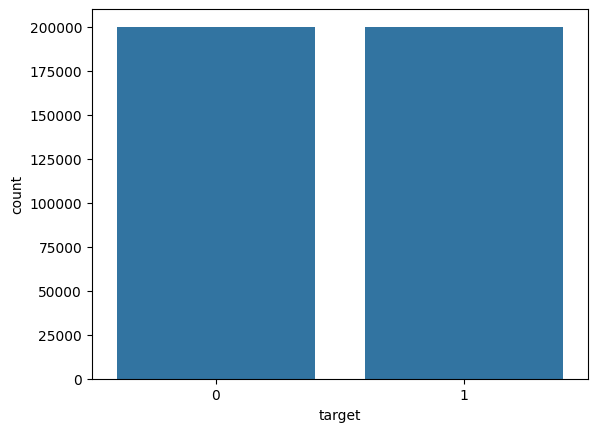

In [17]:
import seaborn as sns
sns.countplot(x=df['target'])

In [18]:
stop_words = ['a','about','above','after','again','against','ain','all','am','an','and','any','are','aren','as','at','be','because','been','before','being','below','between','both','but','by','can','couldn','d','did','didn','do','does','doesn','doing','don','down','during','each','few','for','from','further','had','haha','hadn','has','hasn','have','haven','having','he','her','here','hers','herself','him','himself','his','how','i','im','if','in','into','is','isn','it',"it's",'its','itself','just','ll','m','ma','me','mightn','more','most','mustn','my','myself','needn',"needn't",'nor','now','o','of','off','on','once','only','or','other','our','ours','ourselves','out','over','own','re','s','same','shan',"shan't",'she',"she's",'should',"should've",'shouldn','so','some','such','t','than','that',"that'll",'the','their','theirs','them','themselves','then','there','these','they','this','those','through','to','too','under','until','up','ve','very','was','wasn','we','were','weren','what','when','where','which','while','who','whom','why','will','with','won','wouldn','y','yay','ye','yeah','you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves','im','omg','lt','ly','p']

In [19]:
import re
# Function to clean tweets
def clean_tweet(text):
    # Remove usernames (@) and hashtags (#)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove non-alphabetic characters (except spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Strip leading/trailing whitespace
    text = text.strip()

    # Tokenize the text into words
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Join words back into a single string
    cleaned_tweet = ' '.join(words)

    return cleaned_tweet

In [20]:
# Assume the text column is named 'text'. Adjust as necessary.
df['cleaned_tweets'] = df['text'].apply(clean_tweet)

In [21]:
# Display the original and cleaned text
df['cleaned_tweets'].head(20)

,cleaned_tweets
0,thats bummer shoulda got david carr third day
1,upset cant update facebook texting might cry r...
2,dived many times ball managed save rest go bounds
3,whole body feels itchy like fire
4,no not behaving mad cant see
5,not whole crew
6,need hug
7,hey long time no see yes rains bit bit lol fin...
8,nope didnt
9,que muera


In [22]:
print(type(df))  # This should print <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [23]:
df.index = range(1, len(df) + 1)  # This will start the index from 1

In [24]:
df.head()

,target,text,cleaned_tweets
1,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
2,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
3,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
4,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
5,0,"@nationwideclass no, it's not behaving at all....",no not behaving mad cant see


In [25]:
df.tail()

,target,text,cleaned_tweets
399996,1,Just woke up. Having no school is the best fee...,woke no school best feeling ever
399997,1,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interviews
399998,1,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask details
399999,1,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...
400000,1,happy #charitytuesday @theNSPCC @SparksCharity...,happy


In [26]:
# You can now use the tokenizer and stopwords
import nltk
from nltk.tokenize import word_tokenize

In [27]:
# Download the punkt tokenizer models
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Function to tokenize tweets
def tokenize_tweet(text):
    # Tokenize the tweet
    words = word_tokenize(text)
    return words

In [29]:
# Assume the cleaned text column is named 'cleaned_tweets'. Adjust as necessary.
df['tokenized_tweets'] = df['cleaned_tweets'].apply(tokenize_tweet)

In [30]:
# Display the original and tokenized tweets
df['tokenized_tweets'].head(20)

,tokenized_tweets
1,"[thats, bummer, shoulda, got, david, carr, thi..."
2,"[upset, cant, update, facebook, texting, might..."
3,"[dived, many, times, ball, managed, save, rest..."
4,"[whole, body, feels, itchy, like, fire]"
5,"[no, not, behaving, mad, cant, see]"
6,"[not, whole, crew]"
7,"[need, hug]"
8,"[hey, long, time, no, see, yes, rains, bit, bi..."
9,"[nope, didnt]"
10,"[que, muera]"


In [31]:
df.head(1)

,target,text,cleaned_tweets,tokenized_tweets
1,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day,"[thats, bummer, shoulda, got, david, carr, thi..."


In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the PorterStemmer
stemmer = PorterStemmer()

In [33]:
# Function to stem words in a list
def stem_words(words):
    return [stemmer.stem(word) for word in words]

In [34]:
# Apply stemming to each tokenized tweet
df['stemmed_tweets'] = df['tokenized_tweets'].apply(stem_words)

In [35]:
# Join stemmed words back into a single string if needed
df['stemmed_tweets_str'] = df['stemmed_tweets'].apply(lambda words: ' '.join(words))

In [36]:
# Display the original and stemmed tweets
# Display the original and stemmed tweets
df[['tokenized_tweets', 'stemmed_tweets', 'stemmed_tweets_str']].head(1)

,tokenized_tweets,stemmed_tweets,stemmed_tweets_str
1,"[thats, bummer, shoulda, got, david, carr, thi...","[that, bummer, shoulda, got, david, carr, thir...",that bummer shoulda got david carr third day


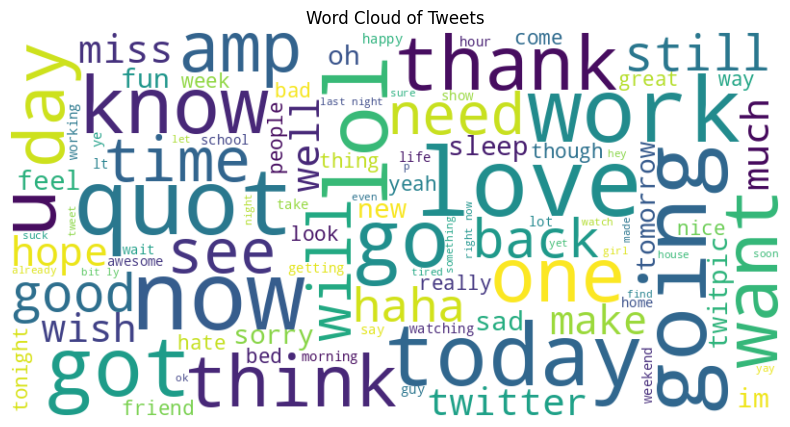

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df['text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    max_words=100,
    background_color='white'
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of Tweets")
plt.show()

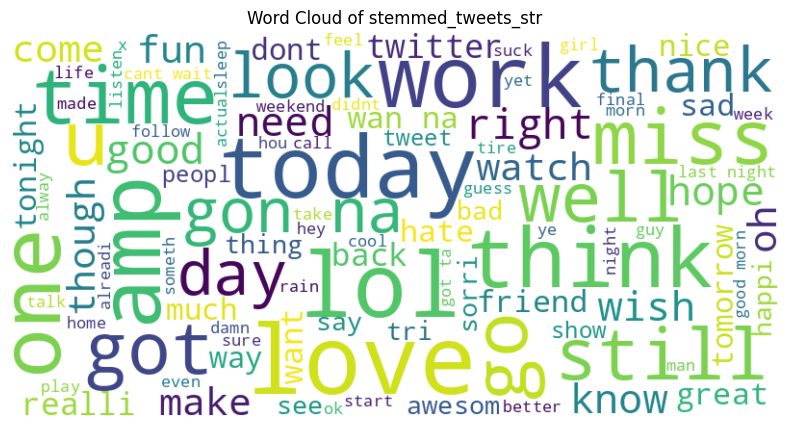

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df['stemmed_tweets_str'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    max_words=100,
    background_color='white'
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of stemmed_tweets_str")
plt.show()

In [39]:
# Replace 'yay' with empty string in 'stemmed_tweets_str' column
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('yay', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('yeah', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('haha', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('im', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('omg', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('yay', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('ye', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('lt', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('ly', '', regex=True)
df['stemmed_tweets_str'] = df['stemmed_tweets_str'].replace('lol', '', regex=True)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the vectorizer (use CountVectorizer if preferred)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on your data size and need

In [41]:
#sperating data
x=df['stemmed_tweets_str'].values
y=df['target'].values

In [42]:
# Fit and transform the text data
x_vectorized = tfidf_vectorizer.fit_transform(x)

In [43]:
# Convert the matrix to a dense format and convert to a DataFrame for easier inspection
tfidf_dense = x_vectorized.toarray()
tfidf_df = pd.DataFrame(tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())

In [44]:
# Print the vectors
print("TF-IDF Vectors:")
print(tfidf_df.head(2))

TF-IDF Vectors:
    aa  aaa  aaah  aah  aaron   ab  abandon  abbi  abc  abil  abit  abl  \
0  0.0  0.0   0.0  0.0    0.0  0.0      0.0   0.0  0.0   0.0   0.0  0.0   
1  0.0  0.0   0.0  0.0    0.0  0.0      0.0   0.0  0.0   0.0   0.0  0.0   

   absolut  abt  abus   ac  academi  accent  accept  access  accid  accident  \
0      0.0  0.0   0.0  0.0      0.0     0.0     0.0     0.0    0.0       0.0   
1      0.0  0.0   0.0  0.0      0.0     0.0     0.0     0.0    0.0       0.0   

   accomplish  accord  account  acct  ace  ach  achiev  ack  acoust  across  \
0         0.0     0.0      0.0   0.0  0.0  0.0     0.0  0.0     0.0     0.0   
1         0.0     0.0      0.0   0.0  0.0  0.0     0.0  0.0     0.0     0.0   

   act  action  activ  actor  actress  actual   ad  ada  adam  adapt  add  \
0  0.0     0.0    0.0    0.0      0.0     0.0  0.0  0.0   0.0    0.0  0.0   
1  0.0     0.0    0.0    0.0      0.0     0.0  0.0  0.0   0.0    0.0  0.0   

   addict  addit  address  adjust  admin  admir

In [45]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.25, random_state=42, stratify=y)

In [46]:
# Check the shapes of the split data
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (300000, 5000)
Testing data shape: (100000, 5000)
Training labels shape: (300000,)
Testing labels shape: (100000,)


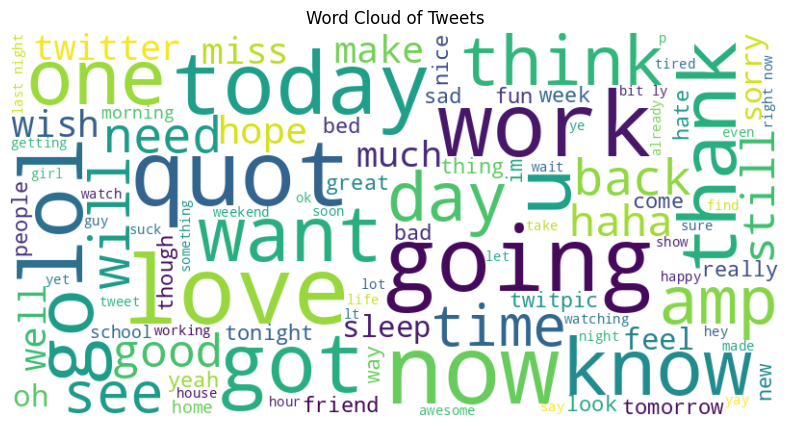

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df['text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    max_words=100,
    background_color='white'
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of Tweets")
plt.show()

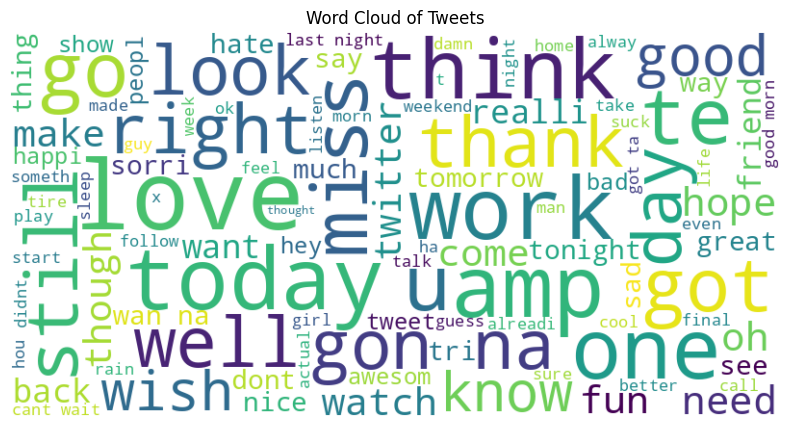

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = ' '.join(df['stemmed_tweets_str'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    max_words=100,
    background_color='white'
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of Tweets")
plt.show()

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
model1=LogisticRegression(max_iter=1000) #max iter means maximum number of times the model can go through

In [51]:
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
# # find accuracy on training data
x_train_prediction=model1.predict(x_train)
x_train_accuracy=accuracy_score(y_train,x_train_prediction)

In [53]:
#but its not the best thing to evaluate on the training data because the model have seen this data before
x_train_accuracy

0.7857166666666666

In [54]:
# prediction about y ==> by taking x_test data
y_pred=model1.predict(x_test)
y_pred_accuracy=accuracy_score(y_test,y_pred)

In [55]:
y_pred_accuracy

0.77414

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix)

Logistic Regression Confusion Matrix:
[[37896 12104]
 [10482 39518]]


In [57]:
pip install scikit-plot

In [58]:
# import sklearn.metrics as metrics
# import scikitplot as skplt
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# # Initialize Logistic Regression
# import matplotlib.pyplot as plt
# # Plot normalized confusion matrix
# skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
# plt.title("Normalized Confusion Matrix")
# plt.show()

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [60]:
# Compute confusion matrix
conf_matrix= confusion_matrix(y_test, y_pred, normalize='true')  # Normalize for percentage values

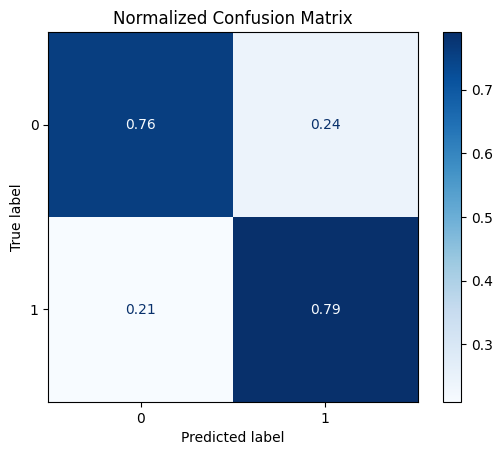

In [61]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title("Normalized Confusion Matrix")
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score

# Optionally, you can also print additional metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model1.decision_function(x_test))

In [63]:
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.77
F1 Score: 0.78
ROC AUC Score: 0.85


In [64]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report:")
print(report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     50000
           1       0.77      0.79      0.78     50000

    accuracy                           0.77    100000
   macro avg       0.77      0.77      0.77    100000
weighted avg       0.77      0.77      0.77    100000



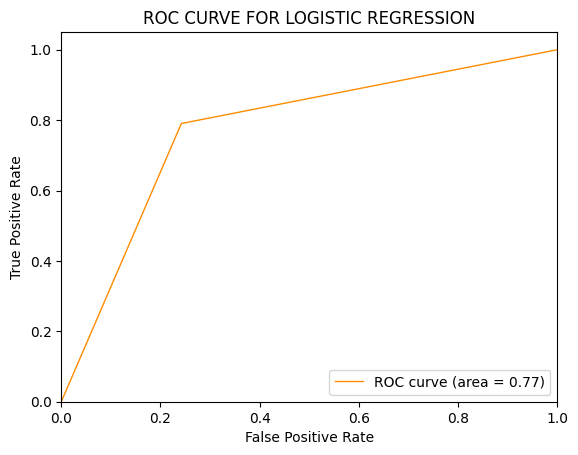

In [65]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR LOGISTIC REGRESSION')
plt.legend(loc="lower right")
plt.show()

In [66]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define the parameter grid
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Regularization type
#     'solver': ['liblinear', 'saga']  # Solver types
# }

# # Create a logistic regression model
# model1 = LogisticRegression(max_iter=1000)

# # Setup the grid search
# grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search
# grid_search.fit(x_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'C': uniform(loc=0.001, scale=100),  # Regularization strength (uniform distribution over the given range)
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver types
}

# Create a logistic regression model
model1 = LogisticRegression(max_iter=1000)

# Setup the randomized search
random_search = RandomizedSearchCV(model1, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'C': 2.0594494295802446, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.77543


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Create a pipeline with scaling (with_mean=False for sparse data) and logistic regression
pipeline = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(max_iter=1000))

# Fit the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [77]:
# Make predictions on the test set
predictions = pipeline.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Print a more detailed classification report
print(classification_report(y_test, predictions))


Accuracy: 0.7731
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     50000
           1       0.76      0.79      0.78     50000

    accuracy                           0.77    100000
   macro avg       0.77      0.77      0.77    100000
weighted avg       0.77      0.77      0.77    100000

